## Task No 02:-

### Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load Historical Stock Data

In [2]:
stock = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
print(stock.head())

C:\Users\USER\AppData\Local\Temp\ipykernel_16956\1237801817.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645645  179.499574  174.425140  174.542917  104487900
2022-01-04  176.378342  179.558457  175.809061  179.254190   99310400
2022-01-05  171.686707  176.839663  171.411883  176.290017   94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
2022-01-07  168.987549  170.921136  167.868622  169.694241   86709100


#### Prepare the Dataset

##### Create target column: next day's Close price

In [3]:
stock['Next_Close'] = stock['Close'].shift(-1)

##### Drop the last row (NaN in Next_Close)

In [4]:
stock.dropna(inplace=True)

##### Features and target

In [5]:
features = ['Open', 'High', 'Low', 'Volume']
X = stock[features]
y = stock['Next_Close']

##### Train-Test Split & Model Training

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

##### Evaluate and Plot Predictions

R² Score: 0.929153437979844
RMSE: 3.767611923788741


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


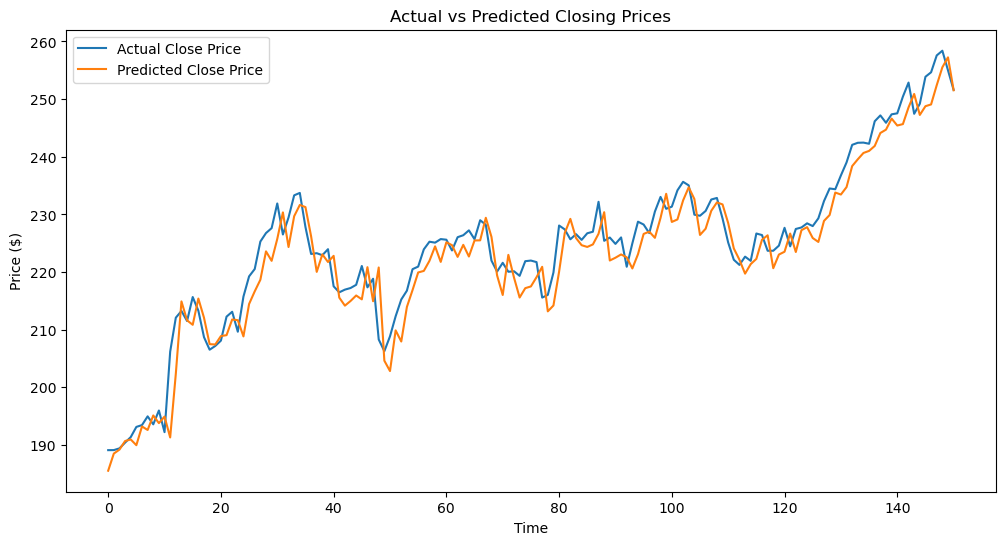

In [7]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Random Forest Regressor

Random Forest R²: -4.419120748438506


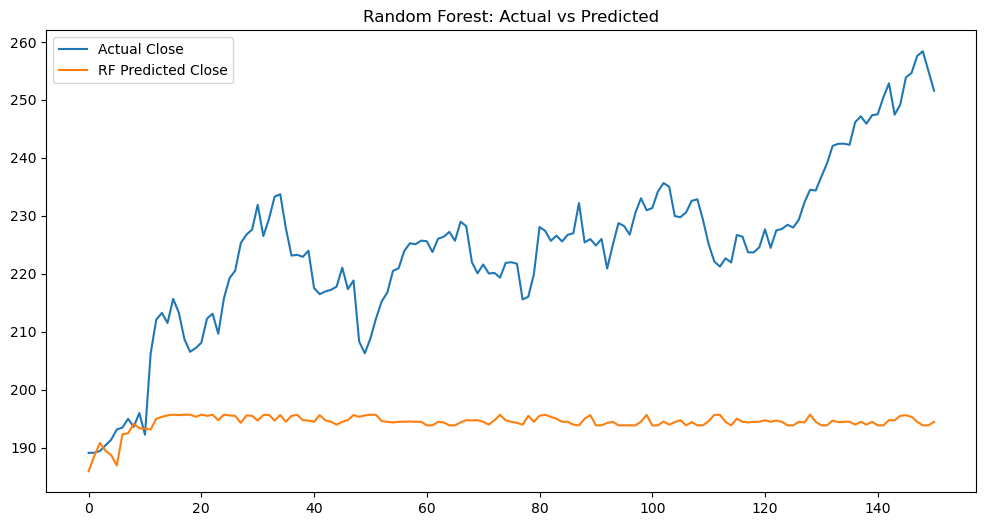

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close')
plt.plot(y_pred_rf, label='RF Predicted Close')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()


# Linear Regression:-
##### Strengths:

Performs well when stock prices follow short-term linear trends.
Captures smooth, gradual changes effectively.
Simple, interpretable, and fast to train.
Works well when input features (Open, High, Low, Volume) have a direct linear relationship with the target (Next Close).
## Why it performed well in your case:
The stock data likely had a predictable linear pattern over short windows.
No need for complex modeling if the data shows minimal non-linearity.

# Random Forest Regressor
##### Strengths:

Handles non-linear relationships and interactions between features.
Robust to outliers and noise.
Doesn't assume any data distribution.
## Why it performed poorly in your case:
It doesn’t understand temporal order, which is critical in time series like stock prices.
Using only current-day features (Open, High, Low, Volume) without lagged or historical context limits its ability to learn meaningful patterns.
The model treats each row independently, ignoring past trends that are crucial in predicting future prices.